# Introducción a las bases de la Astronomía Estelar

La astronomía es una Ciencia cuya fuente de información principal es la radiación que nos llega de las estrellas y demás objetos celestes. El objetivo de esta práctica es familiarizar al estudiante con los modelos más simples para describir la radiación estelar.

## El cuerpo negro y sus aproximaciones

Un cuerpo negro es una entidad física ideal que absorbe toda la
radiación incidente, en todas las longitudes de onda y ángulos de
incidencia posibles. Hacia comienzos de 1900, hubieron varios intentos
de describir el espectro de radiación de un cuerpo negro, hasta que
Planck desarrolló la siguiente expresión:

\begin{equation}
%  B(\nu ,T) = \frac{2
  %    h\nu^{3}}{c^2}\frac{1}{e^{\frac{h\nu}{kT}}-1}\textnormal{.}
  B(\lambda ,T) = \frac{2 h c^{2}}{\lambda^{5}}\frac{1}{e^{\frac{h
        c}{\lambda kT}}-1}
\end{equation}

La cual describe la distribución espectral de la radiación de un
cuerpo negro, en equilibrio termodinámico, a una temperatura
$T$. Dónde $h$ y $k$ son las constantes de Planck y de Boltzmann,
respectivamente, y $c$ es la velocidad de la luz en el vacío.

La distribución de Planck, suele escribirse en terminos de $c_{1}$ y
$c_{2}$, como sigue:

\begin{equation}
  B(\lambda ,T) = \frac{c1}{\lambda^{5}}\frac{1}{e^{\frac{c2}{\lambda
        T}}-1}
\end{equation}

dónde $c_{1} = 2\,h\,c^{2}$ y $c_{2} = h c/k$. Por otro lado, aplicando la
conservación del flujo para todo el espectro, se puede transformar a
frecuencia ($\nu$),

\begin{equation}
B(\nu ,T) d\nu = -B(\lambda ,T) d\lambda
\end{equation}

teniendo en cuenta que: $d\nu = -c/\lambda^{2} d\lambda$.

## Caracterización del cuerpo negro

El flujo irradiado por un cuerpo negro, por unidad de frecuencia, se
puede escribir de la siguiente forma:

\begin{equation}
 F(\nu) = \int B({\nu},T) \cos(\theta) d\Omega
\end{equation}

donde la integral se hace sobre el ángulo sólido $d\Omega$. Debido a
la isotropía del problema, se tiene $F(\nu)=\pi\ B(\nu,T)$. Luego,
integrando para todas las frecuencias se obtiene el flujo total
irradiado,

\begin{equation}
F = \int_{0}^{\infty} F(\nu) d\nu
\end{equation}

Por otro lado, el máximo de la distribución espectral de un cuerpo negro es inversamente proporcional a la temperatura. Esto se conoce como ley de desplazamiento de Wien,

\begin{equation}
\lambda_{\mathrm{max}} T = 0.28978~\mathrm{cm~K.}
\end{equation}

## Ejercicios

#### Objetivos:
* Graficar una función Planckeana para una temperatura determinada.
* Integrar la función entre dos longitudes de onda determinadas.

1. Defina las fucniones de Planck, Wien y Rayleigh-Jeans en la siguiente celda

In [ ]:
k = 1.38E-23             # J/K
h = 6.63E-34             # J s
c = 299792458            # m/s
sb = 5.67051E-5          # erg cm−2 K−4 s−1

c1=2.0*h*c*c
c2=h*c/k

def B(x, T):
  return c1/(np.power(x*1e-10,5)*(np.exp(c2/(x*1e-10*T))-1)) 
def W(x, T):
  return c1/(np.power(x*1e-10,5)*np.exp(c2/(x*1e-10*T)))
def R(x, T):
  return c1*T/(np.power(x*1e-10,4)*c2)

Una vez hecho lo anterior, la siguiente celda grafica las tres funciones:

<IPython.core.display.Javascript object>


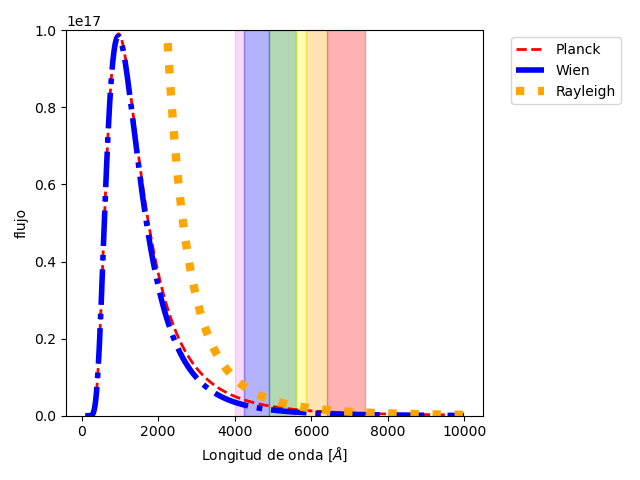

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

T = 30000 # Defino la Temperatura en K

#plt.gcf().clear()
x = np.arange(100,10000,10) # Defino rango de longitudes de onda
fig = plt.figure(1)
ax = fig.add_subplot(111)

ax.plot( x, B(x,T), color = "red", linewidth = 2, linestyle = '--', label = 'Planck' )
ax.plot( x, W(x,T), color = "blue", linewidth = 4, linestyle = '-.', label = 'Wien' )
ax.plot( x, R(x,T), color = "orange", linewidth = 6, linestyle = ':', label = 'Rayleigh' )
plt.ylim(0,1e17)

plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('flujo')

ax.axvspan(4000, 4250, alpha=0.3, color='violet') # banda vertical
ax.axvspan(4250, 4900, alpha=0.3, color='blue')
ax.axvspan(4900, 5600, alpha=0.3, color='green')
ax.axvspan(5600, 5850, alpha=0.3, color='yellow')
ax.axvspan(5850, 6400, alpha=0.3, color='orange')
ax.axvspan(6400, 7400, alpha=0.3, color='red')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


2. La diferencia porcentual, estara dada por la diferencia de cada función respecto a la Planckeana

<IPython.core.display.Javascript object>


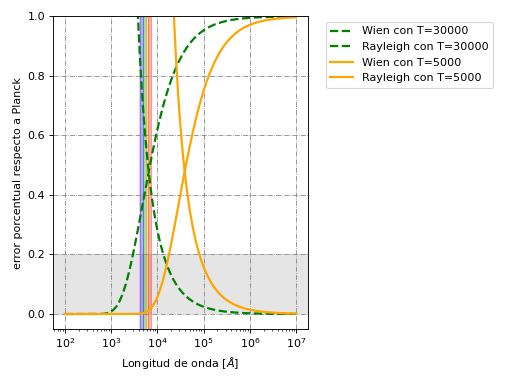

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#plt.gcf().clear()
x = np.arange( 100, 1E7, 100 ) # Ahora calculo entre 124 eV y 1 cm
fig = plt.figure(2)
ax = fig.add_subplot()

T=30000
plt.plot(x, (abs(W(x,T)-B(x,T))/B(x,T)), color = "green", linewidth = 2, linestyle = '--', 
         label='Wien con T=%i' %T )
plt.plot(x, (abs(R(x,T)-B(x,T))/B(x,T)), color = "green", linewidth = 2, linestyle = '--',
         label='Rayleigh con T=%i' %T )
T=5000
plt.plot(x, (abs(W(x,T)-B(x,T))/B(x,T)), color = "orange", linewidth = 2, linestyle = '-',
         label='Wien con T=%i' %T )
plt.plot(x, (abs(R(x,T)-B(x,T))/B(x,T)), color = "orange", linewidth = 2, linestyle = '-',
         label='Rayleigh con T=%i' %T )
plt.ylim(-0.05,1,1)

plt.xscale('log')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('error porcentual respecto a Planck')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.grid(color='gray', linestyle='-.', linewidth=0.7) # Grafica la grilla
ax.axhspan(0, 0.2, facecolor="gray", alpha=0.2) # banda horizontal entre y=0 e y=0.2

ax.axvspan(4000, 4250, alpha=0.3, color='violet') # banda vertical
ax.axvspan(4250, 4900, alpha=0.3, color='blue')
ax.axvspan(4900, 5600, alpha=0.3, color='green')
ax.axvspan(5600, 5850, alpha=0.3, color='yellow')
ax.axvspan(5850, 6400, alpha=0.3, color='orange')
ax.axvspan(6400, 7400, alpha=0.3, color='red')

plt.tight_layout()

3. Cómo integrar una función

In [34]:
from scipy.integrate import quad

#editame